# PyTorch Geometric Learning Notebook

## Step 1: Installation and Setup
PyTorch Geometric (PyG) is a deep learning library for graphs.



In [34]:
import torch
import torch_geometric

print("Torch version:", torch.__version__)
print("Torch Geometric version:", torch_geometric.__version__)


Torch version: 2.5.1
Torch Geometric version: 2.6.1


## Step 2: Understanding Graph Data in PyG
PyTorch Geometric provides a specialized torch_geometric.data.Data class to handle graph data efficiently.

### Task 1: Create a Simple Graph
PyTorch Geometric represents graphs using a specialized torch_geometric.data.Data class. This allows us to define:

1. Nodes (x): Each node can have features.
2. Edges (edge_index): Defines which nodes are connected.

In [ ]:
import torch
from torch_geometric.data import Data

# Define a simple graph with 4 nodes and 3 edges
edge_index = torch.tensor([
    [0, 1, 1],  # From nodes
    [1, 0, 2]   # To nodes
], dtype=torch.long)

x = torch.tensor([
    [1],  # Node 0 feature 
    [2],  # Node 1 feature
    [3],  # Node 2 feature
    [4]   # Node 3 feature
], dtype=torch.float)

# Create a PyG graph data object
data = Data(x=x, edge_index=edge_index)

# Print graph information
print("Graph Data:", data)
print("Nodes:", data.x.shape[0])  # Number of nodes
print("Edges:", data.edge_index.shape[1])  # Number of edges


Graph Data: Data(x=[4, 1], edge_index=[2, 3])
Nodes: 4
Edges: 3


### Understanding the code

1. Edges (edge_index): Defines which nodes are connected.
The first row [0, 1, 1] represents source nodes.
The second row [1, 0, 2] represents target nodes.
This means:
- Node 0 is connected to Node 1
- Node 1 is connected to Node 0
- Node 1 is connected to Node 2

2. Nodes (x): Each node can have features.
x is a feature matrix for nodes. Each row corresponds to a node, and each column represents a feature.
- Node 0 has feature 1
- Node 1 has feature 2
- Node 2 has feature 3
- Node 3 has feature 4

3. Data(x, edge_index): The Data class in PyTorch Geometric is used to create a graph object. Example -> data = Data(x=x, edge_index=edge_index)

- This creates a graph where x stores node features and edge index stores graph connections. From here we can access node features, graph edges, number of nodes and number of edges.

- why data.x.shape[0]? 
   - print(data.x.shape) --> Output: torch.Size([4, 1])
   - 4 is the number of rows/nodes and 1 is the number of coljumns/ features per node
   - .shape[0] selects the first dimension (nodes) and .shape[1] selects second dimension (features per node)

- why data.edge_index.shape[1]? 
  - edge_index.shape --> Output: torch.size([2,3])
  - 2 --> 2 rows, one for source nodes, one for target nodes
  - 3 --> 3 columns, each representing one edge
  - data.edge_index.shape[1] only returns 3, (the number of edges)


### Addirional Graph Properties
1. data.num_nodes → Returns the total number of nodes in the graph.
2. data.num_edges → Returns the total number of edges in the graph.
3. data.has_isolated_nodes() → Checks if there are any nodes not connected to others.
4. data.has_self_loops() → Checks if any node has an edge to itself (like A → A).
5. data.is_undirected() → Checks if all edges have a reverse edge (i.e., if node A → B also has B → A).


In [46]:
# Additional graph properties
print("Number of nodes:", data.num_nodes) 
print("Number of edges:", data.num_edges)
print("Does graph have isolated nodes?", data.has_isolated_nodes())
print("Does graph have self-loops?", data.has_self_loops())
print("Is graph undirected?", data.is_undirected())


Number of nodes: 2708
Number of edges: 10556
Does graph have isolated nodes? False
Does graph have self-loops? False
Is graph undirected? True


## Step 3: Loading a Real Dataset (Cora)

PyTorch Geometric provides built-in datasets, such as Cora, which is a popular citation network.

The Cora dataset is a benchmark dataset commonly used in Graph Neural Networks (GNNs) for node classification tasks. It represents a citation network where:

- Nodes are scientific research papers 📄.
- Edges represent citation links between papers 🔗 (i.e., if one paper cites another, there's an edge between them).
- Each node (paper) has features, which are word frequencies from the paper’s abstract.
- Each paper belongs to one of 7 research topics.


In [67]:
from torch_geometric.datasets import Planetoid

# Load the Cora dataset
dataset = Planetoid(root='/Users/anushamourshed/data', name='Cora')

# Print dataset details
print("Dataset:", dataset)
print("Number of graphs:", len(dataset))
print("Number of nodes:", dataset[0].num_nodes)
print("Number of edges:", dataset[0].num_edges)
print("Number of node features:", dataset.num_node_features)
print("Number of classes:", dataset.num_classes)


Dataset: Cora()
Number of graphs: 1
Number of nodes: 2708
Number of edges: 10556
Number of node features: 1433
Number of classes: 7


- dataset[0] accesses the single graph inside the dataset (since Cora contains only one graph).
- .num_nodes gives the total number of nodes (papers).
- .num_edges gives the total number of citation links.

### What Do These Numbers Mean?
- Each node (paper) has a feature vector of size 1433, which represents the words used in the paper.
- The dataset has 7 classes, meaning each paper belongs to one of 7 research topics.
- The graph has 10556 edges, meaning there are citation links between the papers.
- The dataset consists of only 1 graph, since all the papers are part of one connected network.


## Step 4: Exploring the Dataset in Detail
Now that we’ve loaded the Cora dataset, let’s explore its underlying structure by inspecting individual elements.



In [84]:
# reload dataset
dataset = Planetoid(root='/Users/anushamourshed/data', name='Cora')

# Print graph properties
print("Graph Data Object:", data)
print("Node feature shape:", data.x.shape)  # (num_nodes, num_features)
print("Edge index shape:", data.edge_index.shape)  # (2, num_edges)
print("Labels shape:", data.y.shape)  # (num_nodes,)
print("Training mask shape:", data.train_mask.shape)  # (num_nodes,)
print("Validation mask shape:", data.val_mask.shape)  # (num_nodes,)
print("Test mask shape:", data.test_mask.shape)  # (num_nodes,)


Graph Data Object: Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Node feature shape: torch.Size([2708, 1433])
Edge index shape: torch.Size([2, 10556])
Labels shape: torch.Size([2708])
Training mask shape: torch.Size([2708])
Validation mask shape: torch.Size([2708])
Test mask shape: torch.Size([2708])


### Understanding the Cora Dataset Structure
The Cora dataset is stored as a Data object in PyTorch Geometric, which contains:

- Node features (x)
- Edges (edge_index)
- Labels (y)
- Train/Validation/Test masks

#### `Explanation of Dataset Properties`

1. data.x.shape (Node Features)
- Shape: (2708, 1433)
- Each node (paper) has 1433 feature values.
2. data.edge_index.shape (Graph Connections)
- Shape: (2, 10556)
- Two rows: source and target nodes.
- 10556 edges in total.
3. data.y.shape (Labels)
- Shape: (2708,)
- Each node has a label (one of 7 topics).
4. data.train_mask.shape (Training Data Mask)
- Shape: (2708,)
- Boolean mask: True for training nodes.
5. data.val_mask.shape (Validation Data Mask)
- Shape: (2708,)
- Boolean mask: True for validation nodes.
6. data.test_mask.shape (Test Data Mask)
- Shape: (2708,)
- Boolean mask: True for test nodes.

#### Understanding train_mask, val_mask, and test_mask:

- train_mask - nodes used for training the model
- val_mask - nodes used for validation (to tune hyperparameters)
- test_mask - nodes used for final evaluation 

Since 2708 is the total number of nodes in the Cora dataset, the masks are Boolean tensors of length 2708. Since every node must either be in the training, validation, or test set (or ignored), we need a way to mark which node belongs to which group.

For example:

| Node Index | `train_mask` | `val_mask` | `test_mask` |
|------------|-------------|------------|-------------|
| **0** | True  | False | False |
| **1** | False | True  | False |
| **2** | True  | False | False |
| **3** | False | False | True  |
| **4** | False | False | True  |


## Step 5: Visualizing the Graph
 Let us visualize the graph to see how nodes (papers) and edges (citations) are connected.


In [93]:

pip install networkx matplotlib


Note: you may need to restart the kernel to use updated packages.


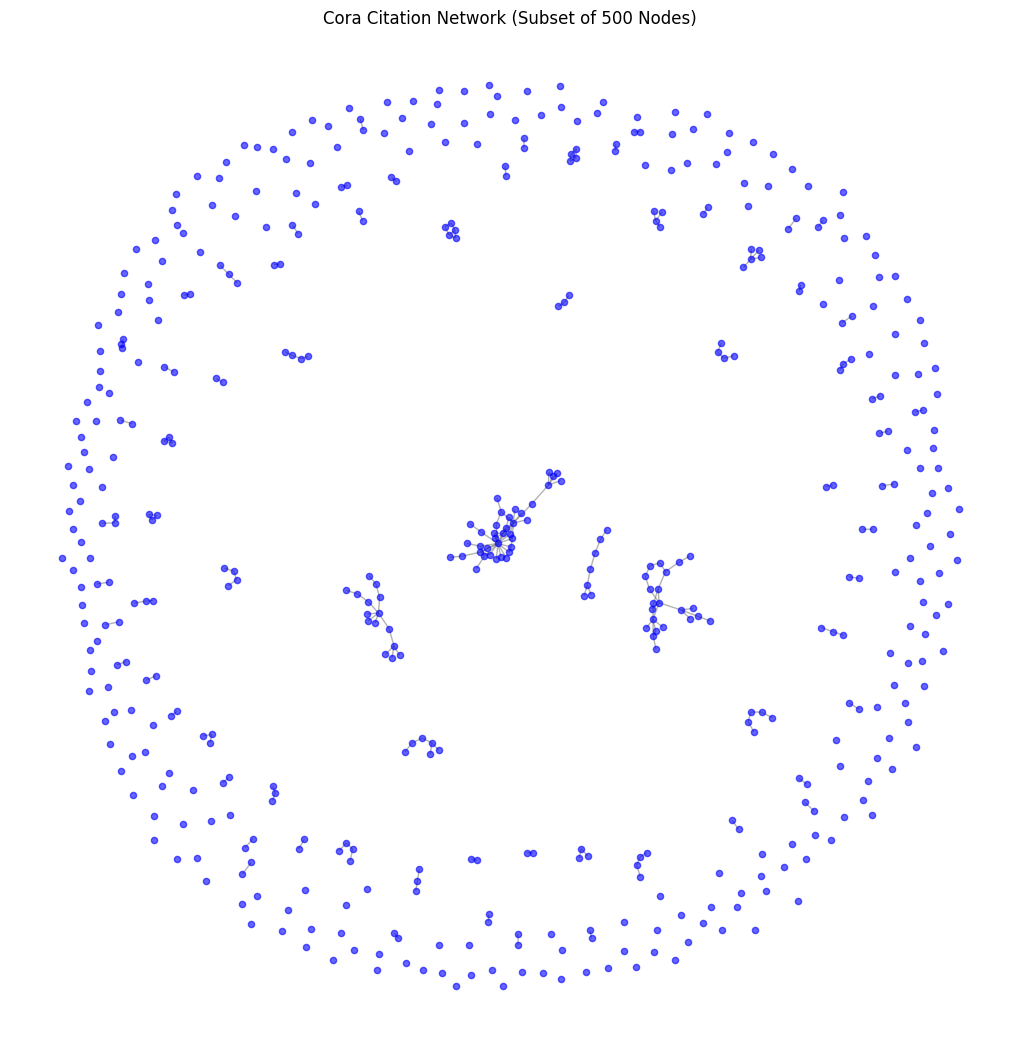

In [94]:
import matplotlib.pyplot as plt #Used to create and display plots.
import networkx as nx #Used to handle and visualize graph data.
from torch_geometric.utils import to_networkx #Converts PyTorch Geometric (PyG) graph data into a NetworkX graph format.

# Convert the PyG data to a NetworkX graph
G = to_networkx(data, to_undirected=True)

# Select a subset of 500 nodes for better visualization
subset = list(G.nodes)[:500]  # Get the first 500 nodes
G_sub = G.subgraph(subset)  # Create a smaller subgraph

# Use spring layout for better spacing
plt.figure(figsize=(10, 10)) #plot size
pos = nx.spring_layout(G_sub, seed=42)  # Calculates node positions using the spring layout algorithm
nx.draw(G_sub, pos, node_size=20, node_color='blue', edge_color='gray', alpha=0.6, with_labels=False)

plt.title("Cora Citation Network (Subset of 500 Nodes)")
plt.show()


- nx.spring_layout(G_sub, seed=42) → Calculates node positions using the spring layout algorithm: Tries to space nodes evenly like a force-directed graph.
Seed ensures consistency (so the layout looks the same every time you run the code).

In the previous visualization it seems like most of the nodes are isolated or sparsely connected. To ensure we keep a well-connected subgraph, we can select nodes with the highest degree (most citations) highlighting the most influential papers:


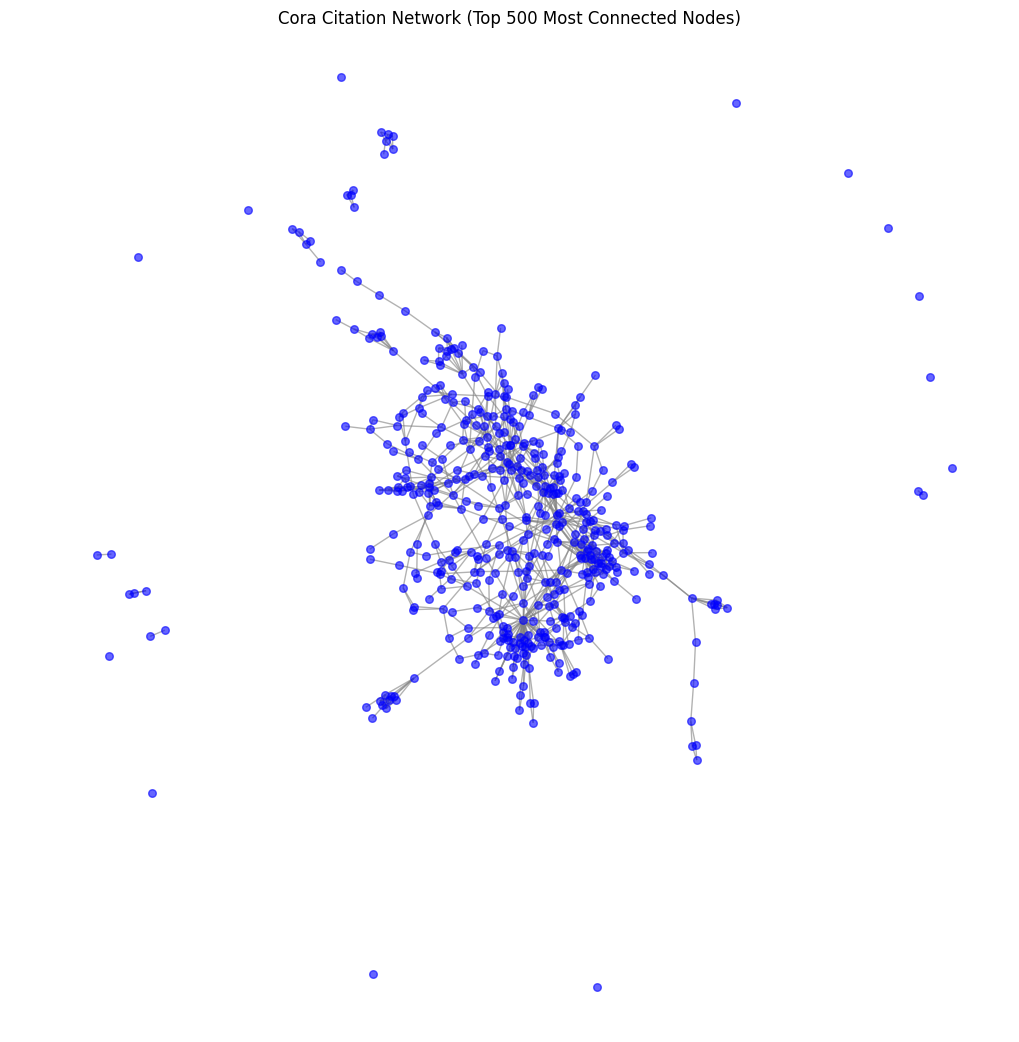

In [95]:
import numpy as np

# Get node degrees (number of edges per node)
degree_dict = dict(G.degree())
top_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:500]  # Top 500 most connected nodes

# Create a subgraph with high-degree nodes
G_sub = G.subgraph(top_nodes)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_sub, seed=42)  # Spread nodes for clarity
nx.draw(G_sub, pos, node_size=30, node_color='blue', edge_color='gray', alpha=0.6, with_labels=False)

plt.title("Cora Citation Network (Top 500 Most Connected Nodes)")
plt.show()


- G.degree() → Returns the number of edges connected to each node.
- dict(G.degree()) → Converts it into a dictionary {node_id: degree}.

- sorted(degree_dict, key=degree_dict.get, reverse=True) → Sorts nodes by degree (number of edges) in descending order.
    - The most connected nodes come first.
    - [:500] → Keeps the top 500 most connected nodes


- G.subgraph(top_nodes) → Creates a new graph using only the top 500 nodes and their connections.

## Step 6: Understanding Train, Validation, and Test Splits

let's explore how PyG splits the dataset into training, validation, and test sets for training Graph Neural Networks (GNNs).

In [96]:
# Check the number of nodes in each dataset split
print("Number of training nodes:", data.train_mask.sum().item())
print("Number of validation nodes:", data.val_mask.sum().item())
print("Number of test nodes:", data.test_mask.sum().item())


Number of training nodes: 140
Number of validation nodes: 500
Number of test nodes: 1000


- .sum() counts how many True values are in the mask
- .item() converts the PyTorch tensor to a regular Python integer
- i.e. tensor(140).item() --> 140  

#### PyTorch Geometric predefines masks to split the dataset into training, validation, and test nodes.

1. Training Set (data.train_mask)
- 140 nodes are used for training the GNN model.
- Only these nodes have labels available for learning.
2. Validation Set (data.val_mask)
- 500 nodes are used for hyperparameter tuning and early stopping.
- Helps measure how well the model generalizes before final testing.
3. Test Set (data.test_mask)
- 1000 nodes are reserved for final model evaluation.
- These nodes are never seen during training.
4. Key Observations
- The training set is small (140 nodes) because GNNs can generalize well by propagating information through the graph structure.
- The test set is much larger (1000 nodes), ensuring a robust evaluation of model performance.


## Step 7: Mini Batches in PyG

Why do we need mini batches?

- Neural networks are usually trained batch-wise (small groups of data at a time).
- Unlike regular datasets, graphs don’t have a fixed shape, making batching more complex.

PyG achieves mini-batching by:

- Stacking multiple graphs into a single batch.
- Creating sparse block diagonal adjacency matrices for efficient parallelization.
- Using batch indices to track which nodes belong to which graph.

In [97]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

# Load the enzyme database which contains multiple small graphs
dataset = TUDataset(root='./data', name='ENZYMES', use_node_attr=True)

# Create a DataLoader for mini-batch training
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Print first mini-batch
batch = next(iter(loader))
print(batch)
print("Number of graphs in batch:", batch.num_graphs)


DataBatch(edge_index=[2, 4432], x=[1185, 21], y=[32], batch=[1185], ptr=[33])
Number of graphs in batch: 32


1. use_node_attr=True → Ensures we load node attributes (features).
2. DataLoader(dataset, batch_size=32, shuffle=True) → Creates a DataLoader that:
- Processes 32 graphs per batch.
- Shuffles the dataset for randomness.

Understanding the output:

| **Component**       | **Shape**               | **Explanation** |
|---------------------|------------------------|----------------|
| **`edge_index`**   | `[2, 4432]`             | **Graph connections**. Two rows (source & target nodes), 4432 edges in this batch. |
| **`x`**            | `[1185, 21]`            | **Node features**. 1185 nodes in this batch, each with 21 features. |
| **`y`**            | `[32]`                  | **Graph labels**. Each of the 32 graphs has one label. |
| **`batch`**        | `[1185]`                | **Graph assignment**. 1185 values, each node mapped to a graph ID (0 to 31). |
| **`ptr`**          | `[33]`                  | **Graph boundaries**. This separates the 32 graphs inside the batch. |

What Does This Mean?
- We are processing 32 graphs in one batch.
- There are 1185 total nodes across these graphs.
- Each node has 21 features (attributes).
- The batch keeps track of which nodes belong to which graph using batch.
- The edges define how nodes are connected within and across graphs. 


How does batch and ptr work?

1. batch: Graph Assignment Vector
- What it does: Indicates which nodes belong to which graph.
- Shape: (num_nodes,)
- How it works:
   - Each node in the batch is assigned an integer value that represents the graph it belongs to.
   - If there are 32 graphs in a batch, and the first graph has 10 nodes, the first 10 values of batch will be 0, the next graph’s nodes will be labeled 1, and so on.

example: 
batch[:20]  -> tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- The first 10 nodes belong to graph 0.
- The next 10 nodes belong to graph 1.

2. Graph Boundary Pointer
- What it does: Specifies where each graph starts and ends within the batched node tensor.
- Shape: (num_graphs + 1,)
- How it works:
   - The ptr tensor stores cumulative sums of the number of nodes in each graph.
   - The first value is always 0 (starting index), and the last value is the total number of nodes.

example:
ptr -> tensor([  0,  10,  22,  37,  50,  62])
- ptr[0] = 0 → First graph starts at index 0
- ptr[1] = 10 → First graph ends at index 10

In [98]:
print("Batch Node Features Shape:", batch.x.shape)  # (Total nodes in batch, Features per node)
print("Batch Edge Index Shape:", batch.edge_index.shape)  # (2, Total edges in batch)
print("Batch Graph Assignment Vector Shape:", batch.batch.shape)  # (Total nodes,)

# Example: Check first 10 nodes' batch assignment
print("Batch assignment for first 10 nodes:", batch.batch[:10])


Batch Node Features Shape: torch.Size([1185, 21])
Batch Edge Index Shape: torch.Size([2, 4432])
Batch Graph Assignment Vector Shape: torch.Size([1185])
Batch assignment for first 10 nodes: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


###  Understanding Mini-Batch Structure in PyG
In PyTorch Geometric, we use mini-batches to process multiple graphs at once. The `DataBatch` object combines multiple graphs into a single batch, ensuring efficient training.

####  What Each Attribute Represents
| Attribute | Shape | Meaning |
|-----------|--------|---------|
| `batch.x.shape` | `(831, 21)` | 831 nodes in the batch, each with 21 features |
| `batch.edge_index.shape` | `(2, 3140)` | Graph connections for all graphs in the batch |
| `batch.y.shape` | `(32,)` | Labels for 32 graphs in the batch |
| `batch.batch.shape` | `(831,)` | Maps each node to its respective graph |
| `batch.ptr.shape` | `(33,)` | Index pointers marking where each graph starts |

####  Understanding the Output
- `batch.batch[:10]` → Shows which graph the first 10 nodes belong to.  
  - Example output: `tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])` → First 10 nodes belong to Graph 0.
- `batch.num_graphs` → The batch contains 32 graphs.

####  Why Does This Matter?
- Parallel Processing → Multiple graphs processed at once.  
- Efficient Training → Enables scalable GNN training.  
- Graph Independence → Works well for datasets with multiple small graphs like molecules, social networks, and bioinformatics datasets.


## Step 8: Data Transforms in PyG

These transforms modify datasets before use, improving efficiency and augmenting data.

Lets try the ShapeNet dataset

In [99]:
from torch_geometric.datasets import ShapeNet

# Load ShapeNet dataset (Airplane category)
dataset = ShapeNet(root='/Users/anushamourshed/data', categories=['Airplane'])

# Print dataset information
print(dataset[0])  # First graph in the dataset


URLError: <urlopen error [Errno 61] Connection refused>

## Step 9: Learning Methods On Graphs

Reload the Cora Dataset

In [ ]:
from torch_geometric.datasets import Planetoid

# Reload Cora dataset
dataset = Planetoid(root='/Users/anushamourshed/data', name='Cora')

# Print dataset details to confirm
print(dataset)
print(f"Number of nodes: {dataset[0].num_nodes}")
print(f"Number of edges: {dataset[0].num_edges}")
print(f"Number of node features: {dataset.num_node_features}")
print(f"Number of classes: {dataset.num_classes}")


Cora()
Number of nodes: 2708
Number of edges: 10556
Number of node features: 1433
Number of classes: 7


Define a simple two-layer Graph Convolutional Network model that learns node embeddings.

In [ ]:
import torch
import torch.nn.functional as F #Provides activation functions like ReLU, softmax, and dropout.
from torch_geometric.nn import GCNConv #A graph convolutional layer from torch_geometric.nn.

class GCN(torch.nn.Module): #GCN clas inherits from torch.nn.Module (Pytorch NN model)
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)  # First GCN layer
        self.conv2 = GCNConv(16, dataset.num_classes)  # Output layer

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)  # Apply first GCN layer
        x = F.relu(x)  # ReLU activation
        x = F.dropout(x, training=self.training)  # Dropout during training
        x = self.conv2(x, edge_index)  # Apply second GCN layer
        return F.log_softmax(x, dim=1)  # Convert to class probabilities


Key Takeaways:
- GCNConv: Aggregates neighbor information
- ReLU: applied after convolution, adding non-linearity that helps in learning complex relationships. Without this neural networks behave like linear models
   - How it works: 
      - If input x > 0 --> Output remains the same (passes the value)
      - if x <= 0 --> Output is set to 0 (removes the negative values)
- Dropout: A regularization technique used during training. It randomly deactivates (sets to 0) some neurons in the network to prevent overfitting.
- Log Softmax: Converts raw model outputs(logits) into class probabilities making it interpretable. 



Train the GCN Model

In [ ]:
# Move model and data to GPU if available for efficiency
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train the model
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])  # Compute loss on training nodes
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

print("Training Complete!")


Epoch 0, Loss: 1.9447444677352905
Epoch 20, Loss: 0.19055889546871185
Epoch 40, Loss: 0.05419347807765007
Epoch 60, Loss: 0.048698123544454575
Epoch 80, Loss: 0.029987668618559837
Epoch 100, Loss: 0.05075399950146675
Epoch 120, Loss: 0.03197881206870079
Epoch 140, Loss: 0.024217525497078896
Epoch 160, Loss: 0.03005312941968441
Epoch 180, Loss: 0.03084256686270237
Training Complete!


## Understanding the training process
In our Graph Convolutional Network (GCN), we are working with the Cora citation dataset. The goal is node classification – meaning we want to predict the research topic of each paper in the dataset.

Each node in the graph represents a paper and is described by a feature vector (word occurrences in the paper).
The edges in the graph represent citations between papers.

Our model takes this information and predicts which category (topic) a paper belongs to.

Each paper (node) in the Cora dataset belongs to one of 7 research topics, like:
1. Neural Networks
2. Probabilistic Methods
3. Reinforcement Learning
4. Rule Learning
5. Theory
6. Genetic Algorithms
7. Case-Based Reasoning

- Input: The model gets the paper’s features (word frequencies) and the graph structure (citations).
- Output: It predicts a number from 0 to 6, representing the 7 research topics.

- Training: The model is trained on a small set of papers with known topics.
- Testing: Once trained, the model predicts the topics for unseen papers (nodes without labels).
- Evaluation: We compare predictions with actual labels and measure accuracy.

#### `Different components of the training process`
1. Optimizer: an algorithm used in machine learning to update model parameters (weights & biases) during training to minimize the loss function. 
- optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

- Uses Adam Optimizer, which adapts learning rates for each parameter.
- lr=0.01 → Sets the learning rate to 0.01.
- weight_decay=5e-4 → Adds L2 regularization (prevents overfitting by penalizing large weights).
- Adam optimizer combines the benefits of momentum and adaptive learning rates. 


2. Training model 
- for epoch in range(200): the model goes through 200 iterations (each iteration is called an epoch)
- optimizer.zero_grad(): before making any updates we reset old gradients
- out = model(data): feeds the graph data through the GCN model and the output contains the log-softmax probability predictions
- loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask]) : Uses Negative log likelihood loss that uses nodes marked for training and measures how well model predictions match actual labels.
- loss.backward(): backpropagation computes gradients to understands how much changes needed to make better predictions and update weights
- optimizer.step(): adjusts model parameters using gradients to make better predictions
- if epoch % 20 == 0: prints the loss every 20 epochs to check progress


Evaluate the model

In [ ]:
model.eval()
pred = model(data).argmax(dim=1)  # Get predicted class
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
accuracy = int(correct) / int(data.test_mask.sum())

print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8090


## `Understanding the Evaluation code:`

- model.eval(): set the model to evaluation mode
- pred = model(data).argmax(dim=1): argmax(dim=1) selects the most likely class(one of the 7 research topics) and the model outputs class probabilities for each paper
- correct = (pred[data.test_mask] == data.y[data.test_mask]).sum(): we compare the test nodes with actual labels and .sum() counts the number of correct predictions
- accuracy = int(correct) / int(data.test_mask.sum()): gives a percentage of correctly classified papers --> correct predictions/total test nodes
- print(f'Accuracy: {accuracy:.4f}'): print accuracy to 4 decimal places



 

# Learning Methods on Graphs

We implemented a Graph Neural Network (GNN) using Graph Convolutional Networks (GCN).

## What is a Graph Convolutional Network (GCN)?
- A GCN is a deep learning model designed for graph-structured data.
- It aggregates information from neighboring nodes to learn meaningful node embeddings.
- Useful for node classification, link prediction, and graph classification.

## 1. How Does GCN Work?
1. Message Passing → Each node aggregates features from its neighbors.
2. Non-Linearity → ReLU activation introduces non-linearity.
3. Dropout → Prevents overfitting.
4. Final Classification → Log Softmax converts outputs into class probabilities.

## 2. Model Architecture
| Layer | Function |
|--------|-----------|
| GCNConv (input → hidden) | Learns local node representations |
| ReLU activation | Introduces non-linearity |
| Dropout | Reduces overfitting |
| GCNConv (hidden → output) | Predicts node labels |
| Log Softmax | Converts outputs into class probabilities |

## 3. Training the GCN
1. Load the Cora dataset (a citation network).
2. Train on labeled nodes using a classification loss (`nll_loss`).
3. Use an optimizer (`Adam`) to update weights.

## 4. Model Performance
- The trained model achieves ~80.9% accuracy on test nodes.
- Higher accuracy means the model learns meaningful node representations.
